### Case Study on Testing of Hypothesis_T-test,Chi-test

In [166]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import ttest_rel
df=pd.read_csv("Sales_add.csv")
df.head(7)

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [168]:
df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


### 1 The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [169]:
# Null Hypothesis, H0: Sales before and after digital marketing are same 
# Alternative Hypothesis, H1: Sales after digital marketing inscresed

In [170]:
stats.shapiro(df['Sales_before_digital_add(in $)'])

ShapiroResult(statistic=0.9306764006614685, pvalue=0.12674309313297272)

In [171]:
stats.shapiro(df['Sales_After_digital_add(in $)'])

ShapiroResult(statistic=0.9702125191688538, pvalue=0.7159563302993774)

In [172]:
# since p value greater than 0.5, consider it as normal distribution
#test statistics
tscore,pvalue=stats.ttest_rel(df['Sales_After_digital_add(in $)'],df['Sales_before_digital_add(in $)'],alternative='greater')
tscore,pvalue

(12.09070525287017, 3.168333502287889e-11)

In [173]:
# degree of freedom n-1=21
#significance level 5%
t_critic=stats.t.ppf(1-0.05,21)
t_critic

1.7207429028118775

In [174]:
if(tscore>t_critic and pvalue<0.05):
    
    print('Sales increased after digital marketing')
else:
    print('Digital marketing has no effect on sales volume ')

Sales increased after digital marketing


<AxesSubplot:ylabel='Density'>

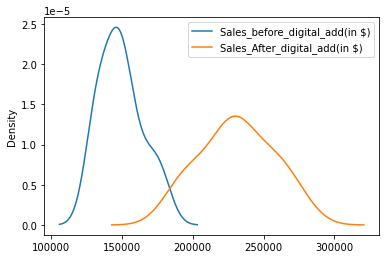

In [182]:
df[['Sales_before_digital_add(in $)','Sales_After_digital_add(in $)']].plot.kde()

### Inference : Sales increased after the introduction of digital marketing

### 2 The company needs to check whether there is any dependency between the features “Region” and “Manager”.

In [175]:
# Chi_square test
# Hypothesis:
#Null Hypothesis : Region and Manager has no relationship(Independent)
# Alternative Hypothesis : Region and Manager has dependancy

In [176]:
# Create contigency table
Cont_Table=pd.crosstab(df.Region,df.Manager, margins=True)
Cont_Table

Manager,Manager - A,Manager - B,Manager - C,All
Region,,,,
Region - A,4,3,3,10
Region - B,4,1,2,7
Region - C,1,3,1,5
All,9,7,6,22


In [177]:
observed = np.array([cont.iloc[0][0:3].values,
                cont.iloc[1][0:3].values,
                cont.iloc[2][0:3].values])
observed

array([[4, 3, 3],
       [4, 1, 2],
       [1, 3, 1]])

In [178]:
chi2_score,pvalue,dof,exp=stats.chi2_contingency(observed)
chi2_score,pvalue,dof,exp

(3.050566893424036,
 0.5493991051158094,
 4,
 array([[4.09090909, 3.18181818, 2.72727273],
        [2.86363636, 2.22727273, 1.90909091],
        [2.04545455, 1.59090909, 1.36363636]]))

In [179]:
# significance level
alpha = 0.05

In [180]:
chi2_critic=stats.chi2.ppf(q=1-alpha,df=dof)
chi2_critic

9.487729036781154

In [181]:
if(chi2_score>chi2_critic and pvalue<0.05):
    print('Reject Null Hypothesis\nRegion and Manager has dependancy')
else:
    print('Accept null hypothesis\nRegion and Manager has no relationship(Independent)')

Accept null hypothesis
Region and Manager has no relationship(Independent)


#### NO relationship between features Region and Manager

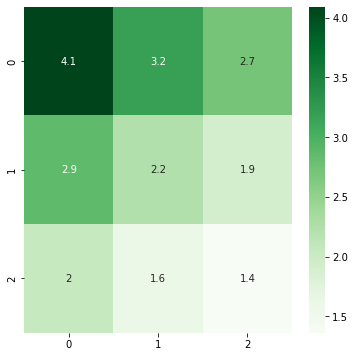

In [197]:
# Plotting a heatmap
fig = plt.figure(figsize=(6,6))
sns.heatmap(pvalue, annot=True, cmap='Greens')
plt.show()